In [14]:
import sys
sys.path.append('../')

In [15]:
from IPython.display import display, HTML
from tft.data import DataLoader
from tft.config import read_config

In [16]:
cfg = read_config('../../config.yaml')

In [17]:
dt = DataLoader(data_dir=cfg.scrape.data_dir).load_all(set_name='TFTSet7_2', days_cutoff=7)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.78s/it]


In [18]:
players_count = dt.participants.index.unique(1).size
matches_count = dt.participants.index.unique(0).size
HTML(f"Unique players {players_count} in {matches_count} matches")

In [19]:
def winrate(x):
    return x.where(x == True).count() / x.count()

def true_count(x):
    return x.where(x == True).count()

def total_perc(total):
    return lambda x: x.count() / total

def winrate_for(df, group: str, cutoff = 1, perc_cutoff = 0.01):
    df['winrate'] = df['placement'] <= cutoff
    df['win'] = df['placement'] <= cutoff
    df['loss'] = df['placement'] >= cutoff
    df['total_perc'] = 1
    cnt = len(df)
    wr = df.groupby(group).agg({
        'winrate': winrate,
        'win': true_count, 'loss': true_count,
        'total_perc': total_perc(cnt),
    })
    return wr[wr['total_perc'] > perc_cutoff].sort_values(by=['winrate'], ascending=False)
    

In [20]:
player_winrate = winrate_for(dt.participants, 'puuid', perc_cutoff = 0.00001)

In [21]:
mn = player_winrate['winrate'].mean()
HTML(f"Mean player winrate <strong>{round(mn * 100, 2)}%</strong>")

<AxesSubplot:xlabel='character_id'>

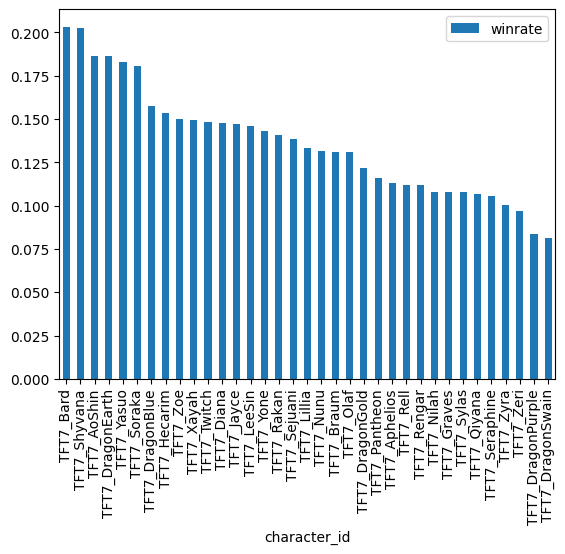

In [22]:
winrate_for(dt.units, 'character_id')[['winrate']].plot(kind='bar')

<AxesSubplot:xlabel='item'>

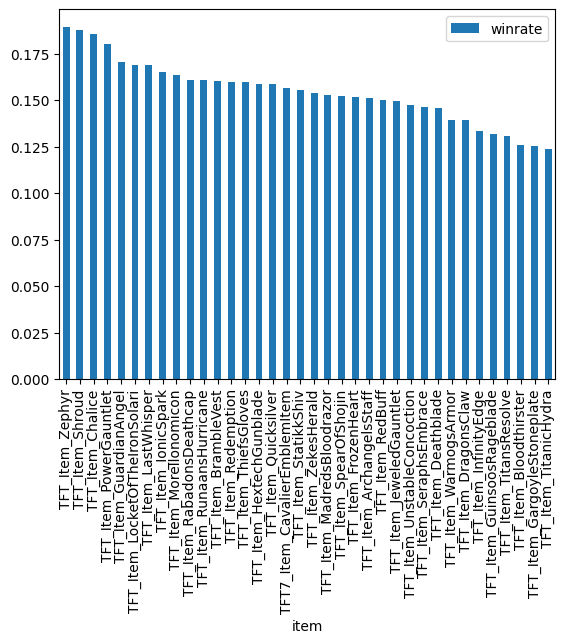

In [23]:
winrate_for(dt.items, 'item')[['winrate']].plot(kind='bar')

<AxesSubplot:xlabel='augment'>

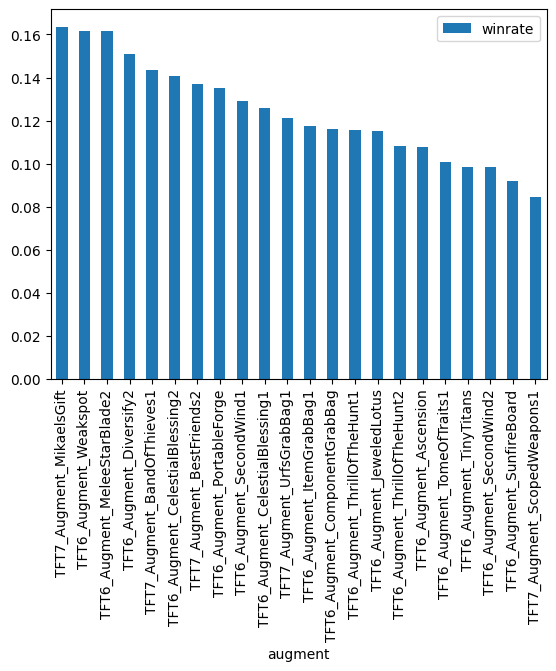

In [24]:
winrate_for(dt.augments, 'augment')[['winrate']].plot(kind='bar')

<AxesSubplot:xlabel='character_id'>

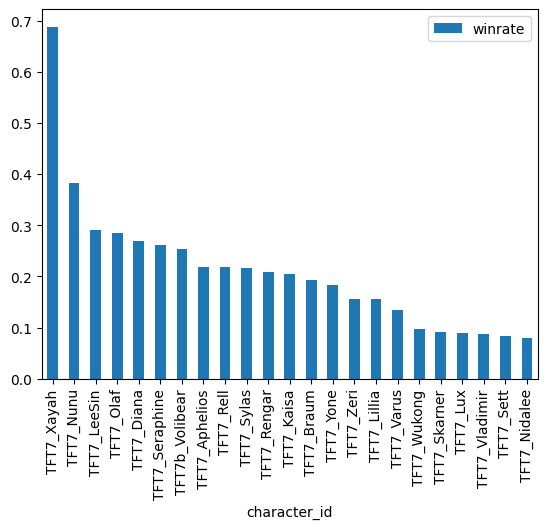

In [25]:
star3_df = dt.units.loc[:][dt.units['tier'] == 3]
winrate_for(star3_df, 'character_id')[['winrate']].plot(kind='bar')

<AxesSubplot:xlabel='character_id,item'>

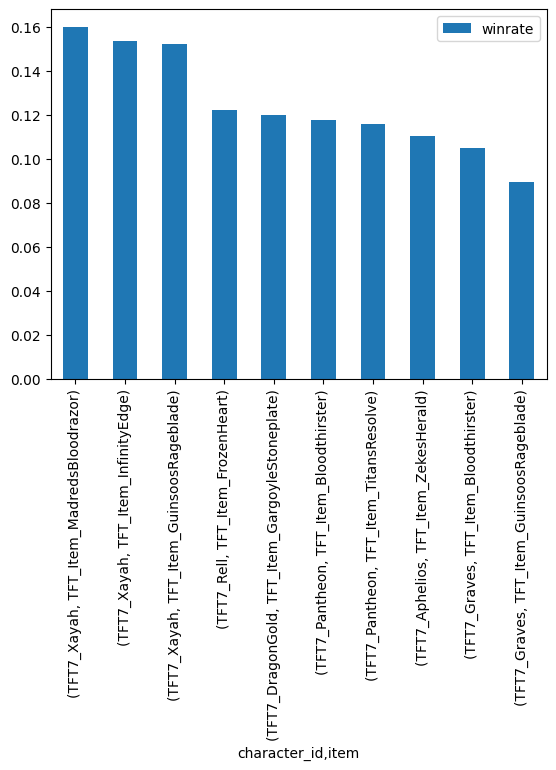

In [26]:
winrate_for(dt.items, ['character_id', 'item'], perc_cutoff = 0.005)[['winrate']].plot(kind='bar')